| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('df.csv')
df.shape

(2107, 20)

In [9]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'Outliers', 'Level'],
      dtype='object')

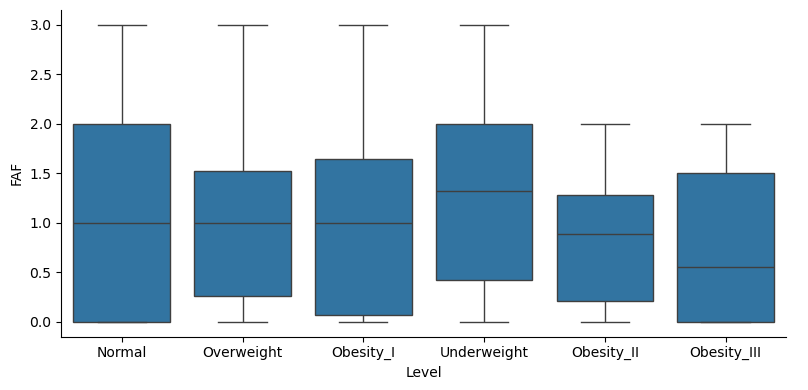

In [7]:
sns.catplot(
    data=df, x="Level", y="FAF", 
    kind="box", height=4, aspect=2,
)

In [20]:
dfv1 = df.groupby(['Level', 'MTRANS'])['Gender'].count().reset_index()
dfv1.columns = ['Level', 'Transport', 'Count']
dfv1

,Level,Transport,Count
0,Normal,Automobile,48
1,Normal,Bike,4
2,Normal,Motorbike,6
3,Normal,Public_Transportation,206
4,Normal,Walking,32
5,Obesity_I,Automobile,109
6,Obesity_I,Motorbike,3
7,Obesity_I,Public_Transportation,255
8,Obesity_I,Walking,3
9,Obesity_II,Automobile,97


In [29]:
fig = px.bar(dfv1, x='Level', y='Count', color = 'Transport')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()

In [34]:
# Frequent consumption of high caloric food

dfv2 = df.groupby(['Level', 'FAVC'])['Gender'].count().reset_index()
dfv2.columns = ['Level', 'FAVC', 'Count']
fig = px.bar(dfv2, x='Level', y='Count', color = 'FAVC')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()


In [14]:
df['Level'].value_counts()

Level
Overweight     566
Obesity_I      370
Obesity_II     337
Normal         296
Obesity_III    271
Underweight    267
Name: count, dtype: int64